#PROJECT SUSPENSO ML MODEL
##### In this model will predit precious camber angle.

### Importing Libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import Dataset

In [21]:
Suspensos_df = pd.read_csv("TOE_L_01_TOE_R_0_CAMBER_L_02_CAMBER_R_03.csv")

In [22]:
Suspensos_df.head(10)

,Time,Alpha_L1,Alpha_L2,Alpha_R1,Alpha_R2,CamberL1,CamberR1,Fx_Air,Fx_L1,Fx_L2,...,Fz_R2,MuX_L1,MuX_L2,MuX_R1,MuX_R2,MuY_L1,MuY_L2,MuY_R1,MuY_R2,Steer_SW
0,6.775,-0.450493,-0.008141,0.414398,0.000155,-2.508755,-3.349134,-404.223681,1707.790859,-38.821271,...,3388.780583,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-6.967526
1,6.800,-0.459491,-0.009453,0.405207,-0.001057,-2.506539,-3.351357,-405.464395,1706.893674,-38.719810,...,3393.896931,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-6.657664
2,6.825,-0.462532,-0.012014,0.402075,-0.003538,-2.505318,-3.352575,-406.705776,1706.078795,-38.636918,...,3400.075008,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-6.534382
3,6.850,-0.461736,-0.015929,0.402853,-0.007431,-2.505054,-3.352826,-407.947836,1705.322549,-38.594466,...,3406.131673,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-6.539513
4,6.875,-0.461470,-0.020874,0.403120,-0.012429,-2.505051,-3.352810,-409.190582,1704.535998,-38.583076,...,3410.796078,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-6.602471
5,6.900,-0.461728,-0.026311,0.402875,-0.017989,-2.505227,-3.352612,-410.434012,1703.744402,-38.597698,...,3413.617662,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-6.703522
6,6.925,-0.462350,-0.031766,0.402275,-0.023605,-2.505527,-3.352288,-411.678112,1702.933051,-38.632480,...,3414.928759,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-6.847532
7,6.950,-0.462431,-0.036912,0.402232,-0.028913,-2.506032,-3.351758,-412.922867,1702.111198,-38.678858,...,3415.343013,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-7.046847
8,6.975,-0.461565,-0.041544,0.403156,-0.033687,-2.506774,-3.350989,-414.168270,1701.288677,-38.731370,...,3415.349254,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-7.306206
9,7.000,-0.459577,-0.045529,0.405224,-0.037785,-2.507764,-3.349969,-415.414321,1700.478010,-38.787212,...,3415.151888,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-7.617982


In [23]:
Suspensos_df.describe()

,Time,Alpha_L1,Alpha_L2,Alpha_R1,Alpha_R2,CamberL1,CamberR1,Fx_Air,Fx_L1,Fx_L2,...,Fz_R2,MuX_L1,MuX_L2,MuX_R1,MuX_R2,MuY_L1,MuY_L2,MuY_R1,MuY_R2,Steer_SW
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,...,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,23.475000,3.267700,1.553909,5.330407,1.477507,-2.847189,-2.304960,-210.389719,380.221483,-335.424599,...,2163.370861,1.012734,1.013154,1.011687,1.013622,1.012734,1.013154,1.011687,1.013622,-67.767235
std,9.652574,8.858696,2.450209,12.531674,2.416611,0.974217,3.218906,90.804054,2277.990453,602.263056,...,1532.663374,0.038683,0.037451,0.050388,0.045045,0.038683,0.037451,0.050388,0.045045,163.725356
min,6.775000,-7.210323,-5.245060,-5.690038,-4.907930,-5.904894,-4.778629,-470.548502,-7051.584251,-2959.328475,...,0.000000,0.812500,0.875000,0.750000,0.750000,0.812500,0.875000,0.750000,0.750000,-720.000000
25%,15.125000,-0.443378,-0.045529,0.408606,-0.042135,-3.119294,-3.377440,-242.122044,-825.387964,-339.041528,...,945.065587,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-76.874072
50%,23.475000,2.455407,2.028640,3.584963,1.969032,-2.861731,-2.917642,-190.347329,1181.375035,-51.711772,...,1648.254206,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-50.071848
75%,31.825000,3.372165,3.185132,4.563383,3.210644,-2.463443,-2.597712,-163.336972,2241.645664,-39.554004,...,3368.264842,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-5.064707
max,40.175000,41.390275,6.631263,60.493365,6.856775,-0.511278,11.586292,-80.381820,4808.205228,70.866186,...,5695.856347,1.100000,1.100000,1.100000,1.100000,1.100000,1.100000,1.100000,1.100000,157.006929


In [24]:
Suspensos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time       1337 non-null   float64
 1    Alpha_L1  1337 non-null   float64
 2    Alpha_L2  1337 non-null   float64
 3    Alpha_R1  1337 non-null   float64
 4    Alpha_R2  1337 non-null   float64
 5    CamberL1  1337 non-null   float64
 6    CamberR1  1337 non-null   float64
 7    Fx_Air    1337 non-null   float64
 8    Fx_L1     1337 non-null   float64
 9    Fx_L2     1337 non-null   float64
 10   Fx_R1     1337 non-null   float64
 11   Fx_R2     1337 non-null   float64
 12   Fy_Air    1337 non-null   float64
 13   Fy_L1     1337 non-null   float64
 14   Fy_L2     1337 non-null   float64
 15   Fy_R1     1337 non-null   float64
 16   Fy_R2     1337 non-null   float64
 17   Fz_Air    1337 non-null   float64
 18   Fz_L1     1337 non-null   float64
 19   Fz_L2     1337 non-null   float64
 20   Fz_R1  

### Visualize Dataset

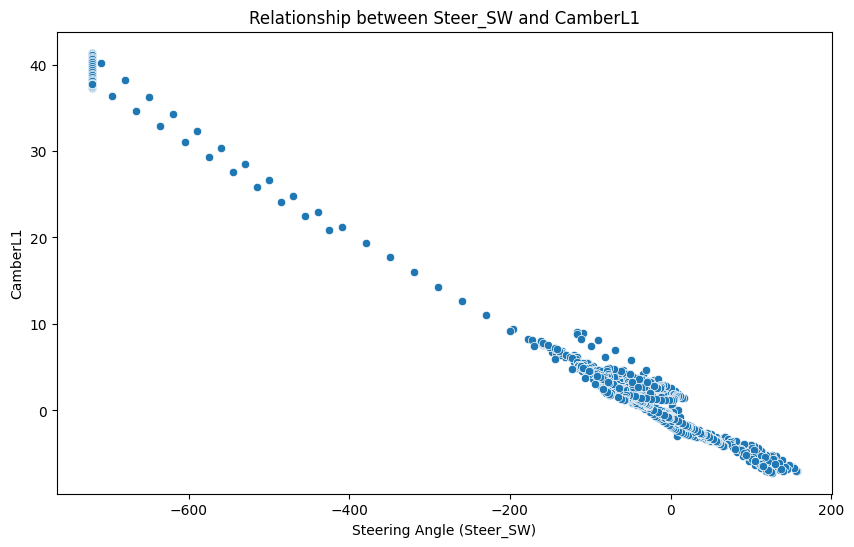

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Suspensos_df, x=' Steer_SW', y=' Alpha_L1')
plt.title('Relationship between Steer_SW and CamberL1')
plt.xlabel('Steering Angle (Steer_SW)')
plt.ylabel('CamberL1')
plt.show()


Melted DataFrame head (showing combined force data):
   Steer_SW Force_Type  Force_Value
0 -6.967526      Fx_R1  1707.657757
1 -6.657664      Fx_R1  1706.893993
2 -6.534382      Fx_R1  1706.051112
3 -6.539513      Fx_R1  1705.136202
4 -6.602471      Fx_R1  1704.256674


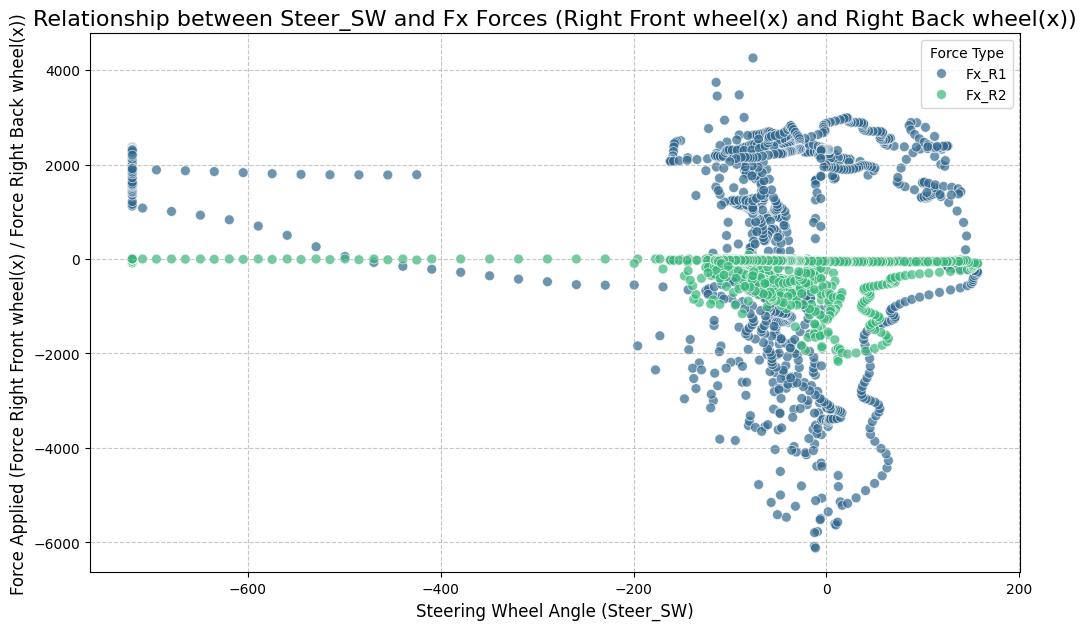

In [26]:
df = pd.read_csv("SuspensionData.csv")
df.columns = df.columns.str.strip()

x_col = 'Steer_SW'
y_cols_to_plot = ['Fx_R1', 'Fx_R2']

required_cols = [x_col] + y_cols_to_plot
if not all(col in df.columns for col in required_cols):
    print(f"Error: One or more required columns ({required_cols}) not found in the DataFrame.")
    print("Available columns:", df.columns.tolist())
    exit()

df_melted = df.melt(
    id_vars=[x_col],
    value_vars=y_cols_to_plot,
    var_name='Force_Type',  # New column for 'Fx_R1' or 'Fx_R2'
    value_name='Force_Value' # New column for the actual force value

)

print("\nMelted DataFrame head (showing combined force data):")
print(df_melted.head())

plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df_melted,
    x=x_col,
    y='Force_Value', # Use the new combined force column
    hue='Force_Type', # Use the new column indicating source (Fx_R1 or Fx_R2) for coloring
    palette='viridis', # Choose a color palette (e.g., 'viridis', 'plasma', 'coolwarm')
    s=50,               # Size of the points
    alpha=0.7           # Transparency of the points
)

plt.title(f'Relationship between {x_col} and Fx Forces (Right Front wheel(x) and Right Back wheel(x))', fontsize=16)
plt.xlabel('Steering Wheel Angle (Steer_SW)', fontsize=12)
plt.ylabel('Force Applied (Force Right Front wheel(x) / Force Right Back wheel(x))', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7) # Add a subtle grid
plt.legend(title='Force Type') # Add a legend
plt.show()

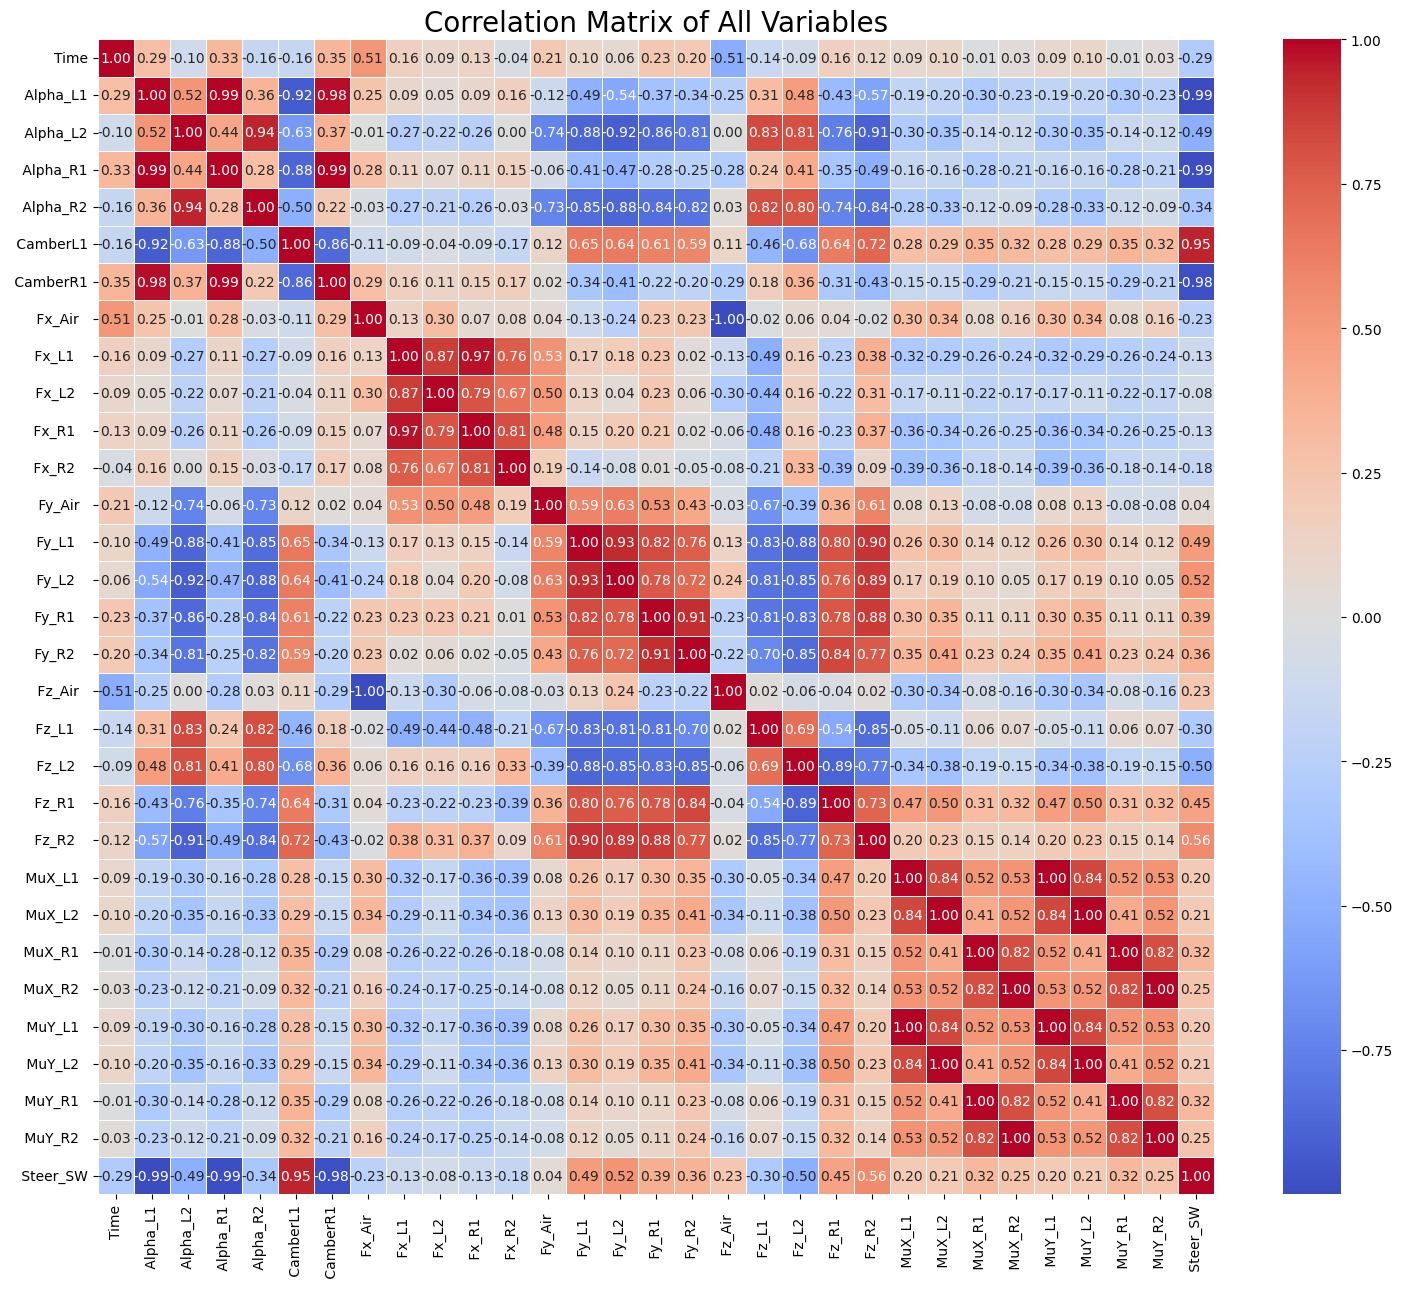

In [27]:
plt.figure(figsize=(18, 15))
# Calculate correlation matrix for all remaining columns
correlation_matrix = Suspensos_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of All Variables', fontsize=20)
plt.show()

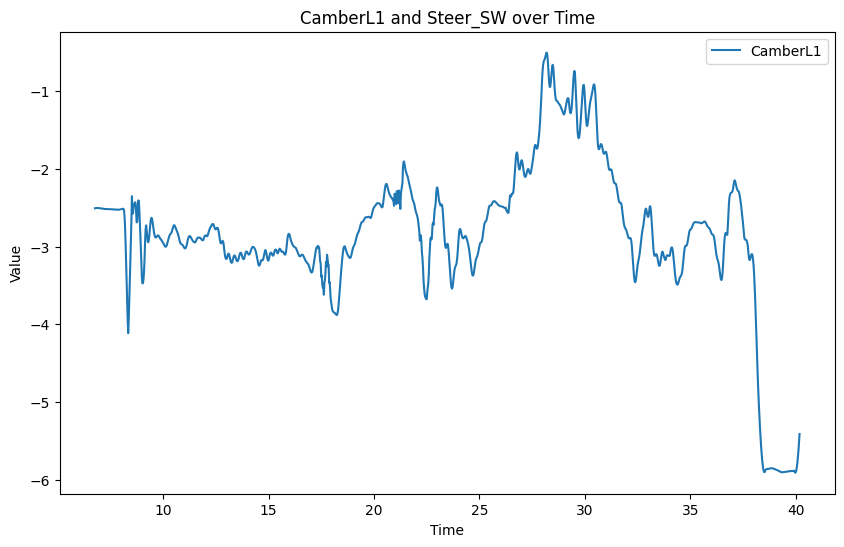

In [28]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=Suspensos_df, x='Time', y=' CamberL1', label='CamberL1')
plt.title('CamberL1 and Steer_SW over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

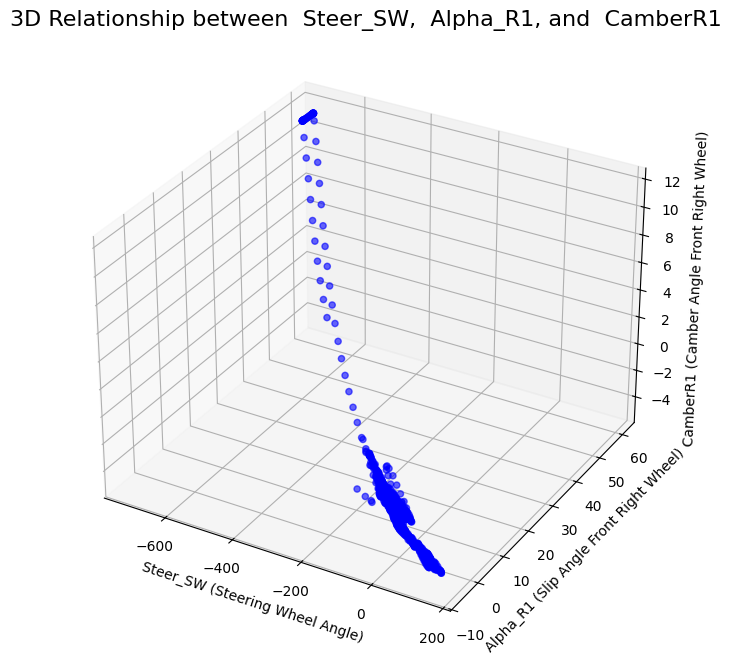

In [29]:
df = pd.read_csv("SuspensionData.csv")

x_col = ' Steer_SW'
y_col = ' Alpha_R1'
z_col = ' CamberR1'

plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')

ax.scatter(df[x_col], df[y_col], df[z_col], c='blue', marker='o', alpha=0.6)

ax.set_xlabel(f'{x_col} (Steering Wheel Angle)')
ax.set_ylabel(f'{y_col} (Slip Angle Front Right Wheel)')
ax.set_zlabel(f'{z_col} (Camber Angle Front Right Wheel)')
ax.set_title(f'3D Relationship between {x_col}, {y_col}, and {z_col}', fontsize=16)

plt.show()